# CS 498 AML HW 6

#### Roshan Rajan (rjrajan2), Kirsten Wong (kewong2), Kenneth Zhang (kfzhang2)

In [1]:
%matplotlib inline
import numpy as np
import scipy
from matplotlib import pyplot as plt

## EM Topic Models

The UCI Machine Learning dataset repository hosts several datasets recording word counts for documents here. You will use the NIPS dataset.<br><br> You will find:<br> (a) a table of word counts per document and <br>
(b) a vocabulary list for this dataset at the link. You must implement the multinomial mixture of topics model, lectured in class.<br><br>
For this problem, you should write the clustering code yourself (i.e. not use a package for clustering).
Cluster this to 30 topics, using a simple mixture of multinomial topic model, as lectured in class.
Produce a graph showing, for each topic, the probability with which the topic is selected.
Produce a table showing, for each topic, the 10 words with the highest probability for that topic.

### Initialization

In [15]:
# Read files.
# docword stores the document word counts, vocab stores the vocabulary list.
import os
dirname = os.getcwd() + "/docword.nips.noheader.txt"
docword = np.loadtxt(dirname)
dirname = os.getcwd() + "/vocab.nips.txt"
with open(dirname) as f:
    vocab = f.readlines()
vocab = [x.strip() for x in vocab] 

In [72]:
# Transform data into a 1500 x 12419 matrix where each doc is a data point, and each column i is a value
# indicating the frequency of word number i. Matrix should be mostly empty.
docdata = np.zeros((1501,12420))
    
for i in range(0,docword.shape[0]):
    docdata[docword[i][0]][docword[i][1]] += docword[i][2]

In [ ]:
# Declare parameters
n_topics = 30
n_docs = 1500
n_words = 12419
n_nz = 746316

In [33]:
# Use k-means to initialize centers
from sklearn.cluster import KMeans

In [73]:
# Create k-means object and train it on dataset (~150 MB of data), took ~45 seconds
km = KMeans(n_clusters = 30, random_state = 0)
km.fit(docdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [77]:
# Store initial guess for cluster centers.
initial_clst = km.cluster_centers_

### Algorithm

In [ ]:
# EM algorithm. Input: dataset, initial cluster centers, computed above

def EM(ds,init_clst):
    curr_clst = init_clst
    delta = np.zeros((ds.shape[0],curr_clst.shape[0]))
    for i in ds:
        for j in curr_clst:
            
    

## Image Segmentation using EM

You can segment an image using a clustering method - each segment is the cluster center to which a pixel belongs. In this exercise, you will represent an image pixel by its r, g, and b values (so use color images!). Use the EM algorithm applied to the mixture of normal distribution model lectured in class to cluster image pixels, then segment the image by mapping each pixel to the cluster center with the highest value of the posterior probability for that pixel. You must implement the EM algorithm yourself (rather than using a package).<br><br>
Segment each of the test images to 10, 20, and 50 segments. You should display these segmented images as images, where each pixel's color is replaced with the mean color of the closest segment


### Initialization

In [81]:
# Read files.

dirname = os.getcwd() + "/img1.jpg"
img1 = scipy.misc.imread(dirname)
dirname = os.getcwd() + "/img2.jpg"
img2 = scipy.misc.imread(dirname)
dirname = os.getcwd() + "/img3.jpg"
img3 = scipy.misc.imread(dirname)

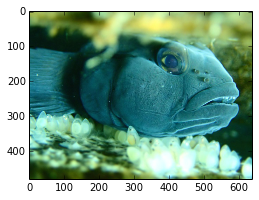

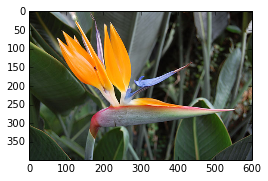

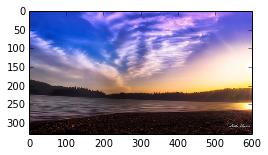

In [95]:
plt.figure(figsize=(4,4))
plt.imshow(img1)
plt.figure(figsize=(4,4))
plt.imshow(img2)
plt.figure(figsize=(4,4))
plt.imshow(img3)

In [ ]:
n_clusts1 = 10
n_clusts2 = 20
n_clusts3 = 50

### Algorithm
We will use a method similar to the previous question, where we estimate initial cluster centers using k-means, and then use EM. 

We will identify one special test image. You should segment this to 20 segments using five different start points, and display the result for each case. Is there much variation in the result?